In [957]:
#Importing the libraries

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import t as t 
from scipy.optimize import curve_fit
from uncertainties import *
from uncertainties.umath import *
from scipy.interpolate import interp1d

In [958]:
#Reading data

gate_33 = pd.read_csv('data/gate_33.dat', sep=' ')
gate_34 = pd.read_csv('data/gate_34.dat', sep=' ')
gate_35 = pd.read_csv('data/gate_35.dat', sep=' ')
drain_10 = pd.read_csv('data/drain_10.dat', sep=' ')
prev = pd.read_excel('data/prev.xlsx')
vyst = pd.read_excel('data/vyst.xlsx')
amp = pd.read_excel('data/amp.xlsx')

In [959]:
# Constants and values

U_D_0 = 10 #V
U_G_0 = 3.4 #V
I_D_0 = 6.639 * 10**(-3) #A
R_0 = 1506 #Ohm
E = 20 #V
delta_U_G = 0.2 #V

#Function to compute the uncertainty
def uncert(data_input, uncert_inst):
    t_coeff = t.ppf((1 + 0.6827)/2, len(data_input)-1)
    return np.sqrt((np.std(data_input)/np.sqrt(len(data_input)))**2 + uncert_inst**2)*t_coeff

# Function to compute the derivative
def derivative(f, x, dx=1e-6):
    return (f(x + dx) - f(x - dx)) / (2 * dx)

def derivative_uns(f, x, x_uns, dx=1e-6):
    val = derivative(f, x)
    plus = derivative(f, x + x_uns)
    minus = derivative(f, x - x_uns)
    uns = max(abs(plus - val), abs(val - minus))
    out = ufloat(val, uns)
    return out

def line(x, x0, y0, k):
    return k * (x - x0) + y0

def tangent(y_1, y_2, x_1, x_2):
    return (y_2 - y_1)/(x_2 - x_1)

In [960]:
#Canculation

#Charakteristika tranzistoru
f_prev = interp1d(drain_10['U_G'], drain_10['I_D']*10**(-3), kind='cubic', fill_value="extrapolate")
k_prev = derivative_uns(f_prev, 3.3, 0.02)
S = k_prev 
print(f"S = {S} Ohm^-1")


R_i = tangent(vyst['I_D'][3]*10**(-3), vyst['I_D'][17]*10**(-3), vyst['U_D'][3], vyst['U_D'][17])**(-1)
print(f"R_i = {R_i} Ohm")
U_D_R_val = np.linspace(vyst['U_D'][0], vyst['U_D'][17], 1000)
I_D_R_val = line(U_D_R_val, vyst['U_D'][3], vyst['I_D'][3], (R_i*10**(-3))**(-1))


mu = S * R_i
print(f"mu = {mu}\n")

#Transistor as a amplifier
R_Z = (E - U_D_0) / I_D_0 
print(f"R_Z = {R_Z} Ohm")

A_V = (S*R_Z) / (1 + (R_Z/R_i))
print(f"A_V = {A_V}\n")

delta_U_D = gate_34['U_D'][153] - gate_34['U_D'][13]
print(f"delta_U_D = {delta_U_D} V")

A_G = delta_U_D / delta_U_G
print(f"A_G = {A_G}")

amp['A_M'] = amp['u_m2'] / amp['u_m1']

A_M = ufloat(np.mean(amp['A_M']), uncert(amp['A_M'], 0))
print(f"A_M = {A_M}")

print(amp)

S = 0.0240+/-0.0034 Ohm^-1
R_i = 76502.73224043715 Ohm
mu = (1.84+/-0.26)e+03

R_Z = 1506.2509414068381 Ohm
A_V = 35+/-5

delta_U_D = 13.999999999999961 V
A_G = 69.9999999999998
A_M = 66.4+/-0.5
     u_m1   u_m2        A_M
0  0.0274   1.82  66.423358
1  0.0728   4.88  67.032967
2  0.1280   8.46  66.093750
3  0.1600  10.80  67.500000
4  0.2280  14.80  64.912281


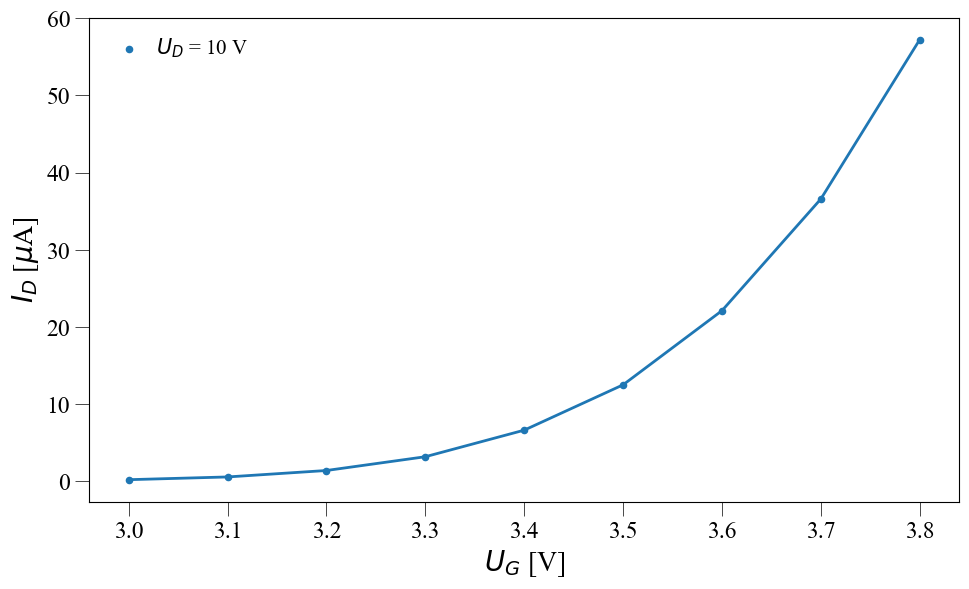

In [961]:
# Plot the data 

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 6))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"$U_G$ [V]")
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel(r"$I_D$ [$\mu$A]")
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=17)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(prev['U_G'], prev['I_D'], color=colors[5], marker='o', s=20, label=r'$U_D$ = 10 V')
ax.plot(prev['U_G'], prev['I_D'], color=colors[5], linewidth=2)

handles, labels = ax.get_legend_handles_labels()
order = [0]

ax.legend([handles[i] for i in order], [labels[i] for i in order]
        ,frameon=False, loc="upper left", 
        #   bbox_to_anchor=(1, 1.0),
		  fontsize=15, ncol=1, handletextpad=0.3)


plt.show() 

fig.savefig('images/prev_out.png', bbox_inches='tight')

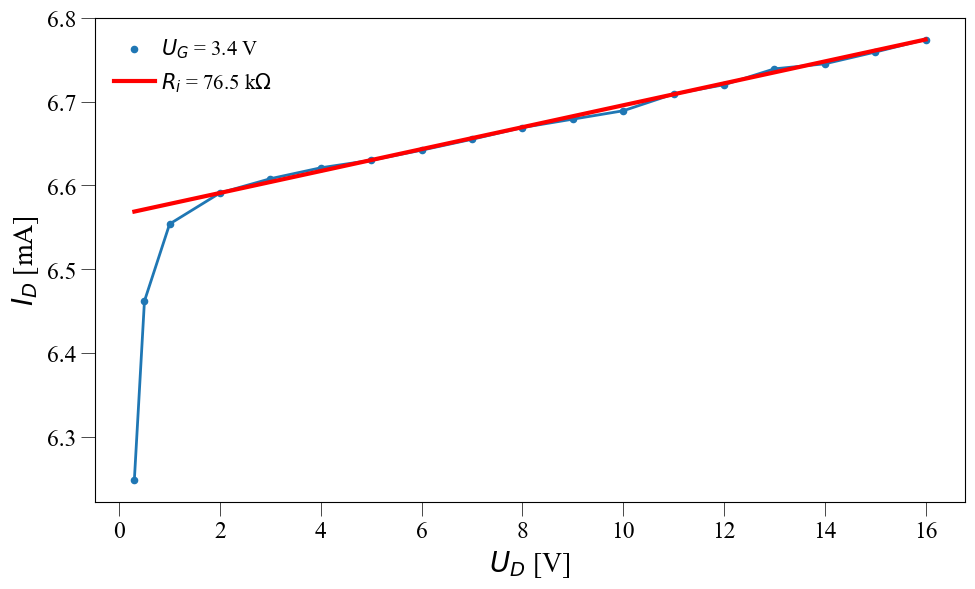

In [962]:
# Plot the data 

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 6))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"$U_D$ [V]")
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel(r"$I_D$ [mA]")
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=17)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(vyst['U_D'], vyst['I_D'], color=colors[5], marker='o', s=20, label=r'$U_G$ = 3.4 V')
ax.plot(vyst['U_D'], vyst['I_D'], color=colors[5], linewidth=2)

ax.plot(U_D_R_val, I_D_R_val, color='red', linewidth=3, label=r'$R_i$ = 76.5 k$\Omega$')

handles, labels = ax.get_legend_handles_labels()
order = [0,1]

ax.legend([handles[i] for i in order], [labels[i] for i in order]
        ,frameon=False, loc="upper left", 
        #   bbox_to_anchor=(1, 1.0),
		  fontsize=15, ncol=1, handletextpad=0.3)


plt.show() 

fig.savefig('images/vyst_out.png', bbox_inches='tight')

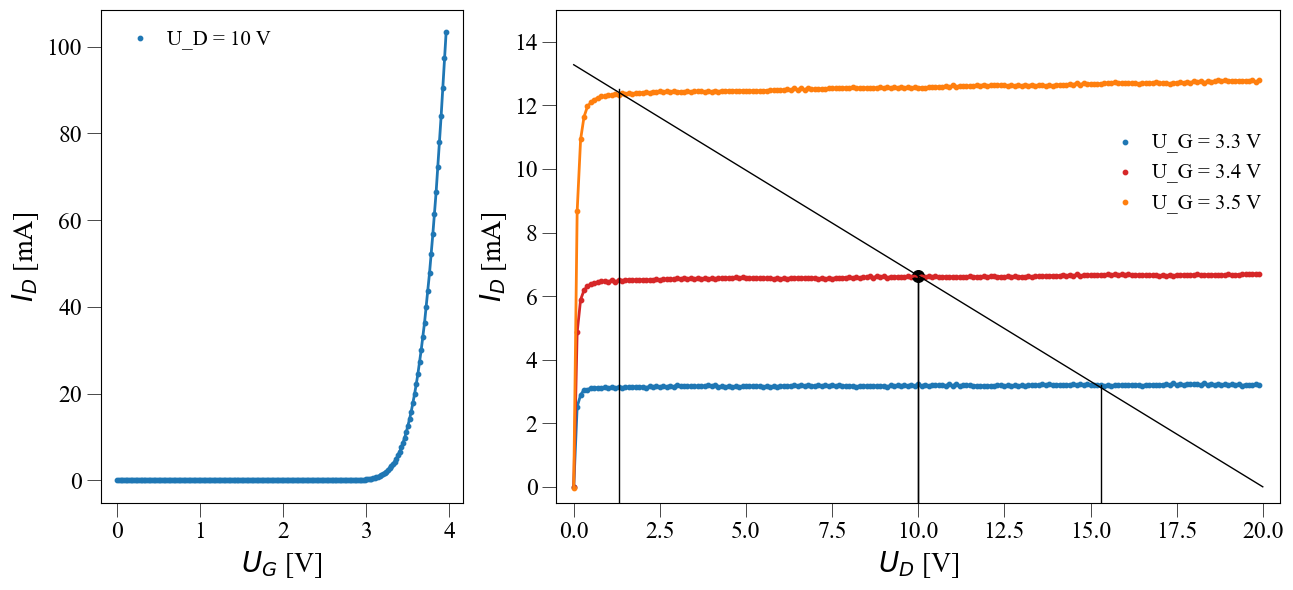

In [963]:
# Plot the data 

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(13, 6))

gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])

ax1 = fig.add_subplot(gs[0])
ax1.set_xlabel(r"$U_G$ [V]")
ax1.xaxis.label.set_fontsize(20)
ax1.set_ylabel(r"$I_D$ [mA]")
ax1.yaxis.label.set_fontsize(20)
ax1.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)
ax1.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=17)

ax1.scatter(drain_10['U_G'], drain_10['I_D'], color=colors[5], marker='o', s=10, label='U_D = 10 V')
ax1.plot(drain_10['U_G'], drain_10['I_D'], color=colors[5], linewidth=2)

handles1, labels1 = ax1.get_legend_handles_labels()
order1 = [0]

ax1.legend([handles1[i] for i in order1], [labels1[i] for i in order1]
        ,frameon=False, loc="upper left", 
        #   bbox_to_anchor=(1, 1.0),
                  fontsize=15, ncol=1, handletextpad=0.3)

ax2 = fig.add_subplot(gs[1])
ax2.set_xlabel(r"$U_D$ [V]")
ax2.xaxis.label.set_fontsize(20)
ax2.set_ylabel(r"$I_D$ [mA]")
ax2.yaxis.label.set_fontsize(20)
ax2.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)
ax2.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=17)
ax2.set_xlim(-0.5, 20.5)
ax2.set_ylim(-0.5, 15)

plt.tight_layout()  

ax2.scatter(gate_33['U_D'], gate_33['I_D'], color=colors[5], marker='o', s=10, label='U_G = 3.3 V')
ax2.plot(gate_33['U_D'], gate_33['I_D'], color=colors[5], linewidth=2)

ax2.scatter(gate_34['U_D'], gate_34['I_D'], color=colors[1], marker='o', s=10, label='U_G = 3.4 V')
ax2.plot(gate_34['U_D'], gate_34['I_D'], color=colors[1], linewidth=2)

# ax2.axvline(x=gate_34['U_D'][170], color='black', linewidth=1)

ax2.scatter(gate_35['U_D'], gate_35['I_D'], color=colors[0], marker='o', s=10, label='U_G = 3.5 V')
ax2.plot(gate_35['U_D'], gate_35['I_D'], color=colors[0], linewidth=2)

ax2.scatter(U_D_0, I_D_0*10**3, color='black', marker='o', s=70)
ax2.plot([U_D_0, U_D_0], [-2, I_D_0*10**3], color='black', linewidth=1)
ax2.plot([U_D_0, U_D_0], [-2, I_D_0*10**3], color='black', linewidth=1)

ax2.plot([0, E], [(E/R_Z)*10**(3), 0], color='black', linewidth=1)
ax2.plot([gate_34['U_D'][13], gate_34['U_D'][13]], [-2, 12.5], color='black', linewidth=1)
ax2.plot([gate_34['U_D'][153], gate_34['U_D'][153]], [-2, 3.19], color='black', linewidth=1)

handles2, labels2 = ax2.get_legend_handles_labels()
order2 = [0,1,2]

ax2.legend([handles2[i] for i in order2], [labels2[i] for i in order2]
        ,frameon=False, loc="lower right", 
          bbox_to_anchor=(1, 0.55),
		  fontsize=15, ncol=1, handletextpad=0.3)


plt.show() 

fig.savefig('images/pr_vs.png', bbox_inches='tight')